<a href="https://colab.research.google.com/github/mhyubr/Deep-Learning-Basic/blob/main/Deep_Learning_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
print(tf.__version__)

2.8.2


# Dataset

In [12]:
house_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [13]:
house_data.shape

(17000, 9)

In [14]:
house_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [15]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [16]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# EDA

Text(0.5, 1.0, '\nKorelasi\n')

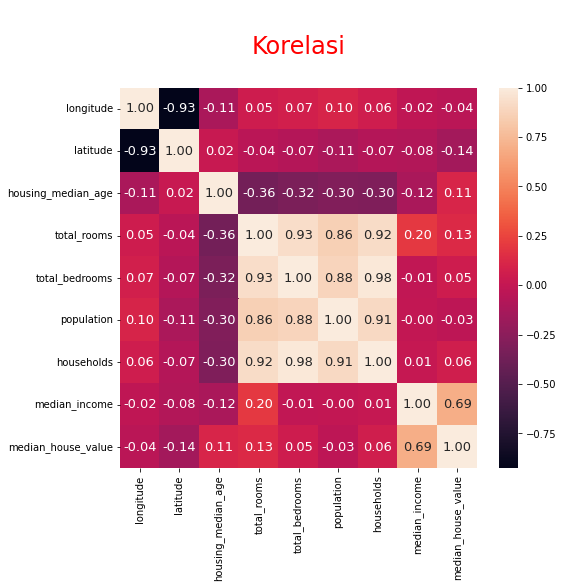

In [34]:
plt.figure(figsize=(8,7))
sns.heatmap(
    house_data.corr(),
    fmt='.2f',
    annot_kws={'size':13},
    annot=True
)
plt.title("\nKorelasi\n", fontsize=24, color='r')

# Split Data

In [36]:
X = house_data.drop('median_house_value', axis=1)
y = house_data['median_house_value']

print(X.shape)
print(y.shape)

(17000, 8)
(17000,)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13600, 8) (13600,)
(3400, 8) (3400,)


# Model

In [40]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu')) # input layer
model.add(Dense(200, activation='relu')) # hidden layer 1
model.add(Dense(200, activation='relu')) # hidden layer 1
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae')

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 8)                   72        
                                                                 
 dense_1 (Dense)             (32, 200)                 1800      
                                                                 
 dense_2 (Dense)             (32, 200)                 40200     
                                                                 
 dense_3 (Dense)             (32, 1)                   201       
                                                                 
Total params: 42,273
Trainable params: 42,273
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100)

Epoch 1/100
340/340 [==============================] - 2s 5ms/step - loss: 135621.9062 - val_loss: 112372.7656
Epoch 2/100
340/340 [==============================] - 1s 4ms/step - loss: 98680.3672 - val_loss: 86392.8906
Epoch 3/100
340/340 [==============================] - 1s 3ms/step - loss: 84492.4688 - val_loss: 81299.1328
Epoch 4/100
340/340 [==============================] - 1s 3ms/step - loss: 81854.4844 - val_loss: 79758.4688
Epoch 5/100
340/340 [==============================] - 1s 3ms/step - loss: 80879.3438 - val_loss: 79749.5156
Epoch 6/100
340/340 [==============================] - 1s 4ms/step - loss: 80025.0391 - val_loss: 79164.5938
Epoch 7/100
340/340 [==============================] - 1s 4ms/step - loss: 79432.4141 - val_loss: 77782.6562
Epoch 8/100
340/340 [==============================] - 1s 4ms/step - loss: 78704.0391 - val_loss: 77197.1641
Epoch 9/100
340/340 [==============================] - 1s 3ms/step - loss: 77922.4297 - val_loss: 76773.5000
Epoch 10/100
340/

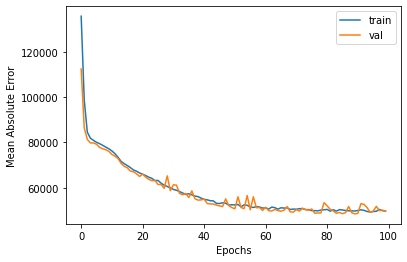

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [46]:
y_pred = model.predict(X_test)

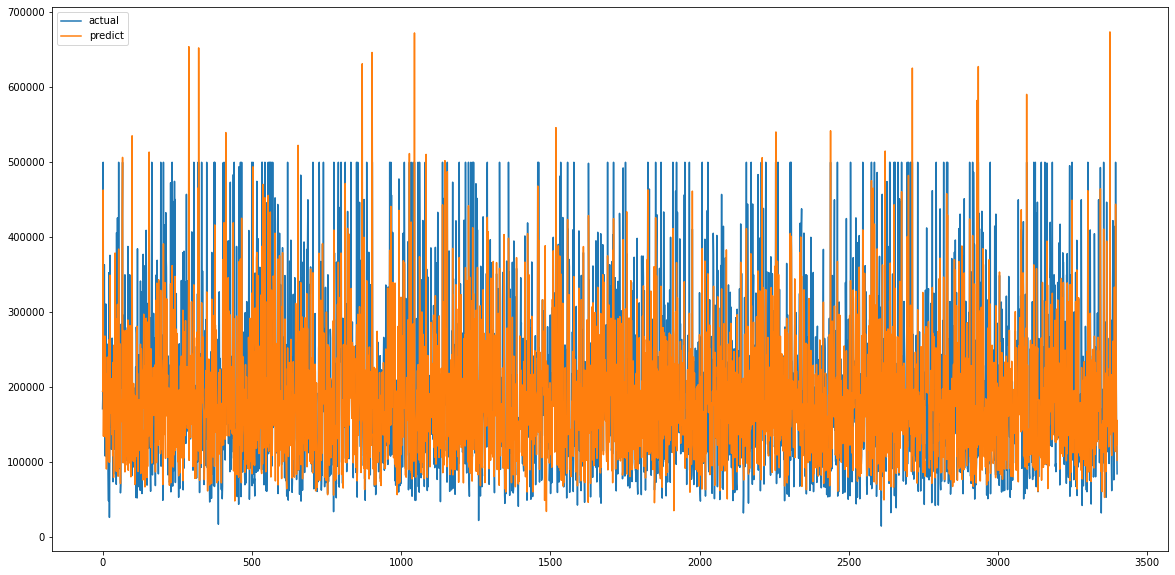

In [48]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label='actual')
plt.plot(y_pred, label='predict')
plt.legend()
plt.show()